# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import pandas as pd
from pprint import pprint
import time
from scipy.stats import linregress
import csv
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#prototype proof of concept 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "New York City"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 63.75,
  'feels_like': 60.62,
  'temp_min': 62.01,
  'temp_max': 64.99,
  'pressure': 1012,
  'humidity': 17},
 'visibility': 10000,
 'wind': {'speed': 5.75, 'deg': 250},
 'clouds': {'all': 1},
 'dt': 1619911143,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1619862853,
  'sunset': 1619913106},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [3]:
lon = weather_json["coord"]["lon"]
lat = weather_json["coord"]["lat"]
temp = weather_json["main"]["temp"]
humidity = weather_json["main"]["humidity"]
cloudiness = weather_json["clouds"]["all"]
wind_speed = weather_json["wind"]["speed"]
name = weather_json["name"]
print(f"The temperature is currently {temp}F. in {name}.")
print(f"The barometer is currently at {humidity}% in {name}.")
print(f"There is {cloudiness}% cloud cover currently in {name}.")
print(f"The wind is currently blowing at {wind_speed} mph in {name}.")
print(f"The latitude of {name} is {lat}.")
print(f"The longitude of {name} is {lon}.")

The temperature is currently 63.91F. in New York.
The barometer is currently at 17% in New York.
There is 1% cloud cover currently in New York.
The wind is currently blowing at 5.75 mph in New York.
The latitude of New York is 40.7143.
The longitude of New York is -74.006.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

In [39]:
pprint(cities)

['punta arenas',
 'japura',
 'upernavik',
 'butaritari',
 'san patricio',
 'saskylakh',
 'busselton',
 'mar del plata',
 'atuona',
 'victoria',
 'umm kaddadah',
 'chicaman',
 'saint george',
 'rocha',
 'tuktoyaktuk',
 'khandyga',
 'torbay',
 'ponta do sol',
 'taolanaro',
 'mbekenyera',
 'souillac',
 'kazalinsk',
 'lasa',
 'khatanga',
 'east london',
 'qaanaaq',
 'hambantota',
 'oranjestad',
 'satitoa',
 'jamestown',
 'norman wells',
 'provideniya',
 'stornoway',
 'albany',
 'zilair',
 'puerto ayora',
 'tashara',
 'avarua',
 'longyearbyen',
 'ruatoria',
 'georgetown',
 'lebu',
 'port elizabeth',
 'tasiilaq',
 'williams lake',
 'iqaluit',
 'ayr',
 'vaini',
 'hatillo',
 'thompson',
 'aksarka',
 'new norfolk',
 'virginia beach',
 'coihaique',
 'dunedin',
 'namibe',
 'port blair',
 'belushya guba',
 'guerrero negro',
 'reynosa',
 'vardo',
 'alotau',
 'tiksi',
 'narsaq',
 'burica',
 'rikitea',
 'faanui',
 'bubaque',
 'sergeyevka',
 'inirida',
 'bandarbeyla',
 'hobart',
 'teshie',
 'mataura',

In [5]:
#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
#     query_url = url + "appid=" + weather_api_key + "&q=" + city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

City not found. skipping.
Processing record 1|rikitea
Processing record 2|cape town
Processing record 3|busselton
Processing record 4|kaeo
Processing record 5|avarua
Processing record 6|komsomolskiy
Processing record 7|asasa
Processing record 8|ribeira grande
Processing record 9|albany
Processing record 10|berlevag
Processing record 11|aswan
Processing record 12|kununurra
Processing record 13|kapaa
Processing record 14|cairns
Processing record 15|carnarvon
Processing record 16|dikson
Processing record 17|punta arenas
Processing record 18|hermanus
Processing record 19|moyale
Processing record 20|langham
Processing record 21|kokopo
Processing record 22|ilembula
Processing record 23|elk grove
Processing record 24|barrow
Processing record 25|chokurdakh
Processing record 26|campos belos
Processing record 27|new norfolk
Processing record 28|ilulissat
Processing record 29|yellowknife
Processing record 30|isabela
Processing record 31|shakawe
Processing record 32|mataura
Processing record 33|ro

Processing record 250|linhares
Processing record 251|mandalgovi
City not found. skipping.
Processing record 252|batagay-alyta
Processing record 253|murray bridge
Processing record 254|opuwo
Processing record 255|ketchikan
Processing record 256|ulaangom
Processing record 257|marsa matruh
Processing record 258|tual
Processing record 259|severodvinsk
City not found. skipping.
Processing record 260|bengkulu
Processing record 261|grootfontein
Processing record 262|coevorden
Processing record 263|wau
City not found. skipping.
Processing record 264|rincon
Processing record 265|thompson
Processing record 266|paysandu
Processing record 267|road town
Processing record 268|chichimila
Processing record 269|vostok
Processing record 270|general roca
Processing record 271|baoshan
Processing record 272|puerto carreno
Processing record 273|mar del plata
Processing record 274|chachapoyas
Processing record 275|sao caetano de odivelas
Processing record 276|ploemeur
Processing record 277|longyearbyen
Proce

Processing record 492|mount pleasant
Processing record 493|pingliang
Processing record 494|turayf
Processing record 495|dunedin
Processing record 496|ballangen
Processing record 497|olafsvik
Processing record 498|quatre cocos
Processing record 499|chicama
Processing record 500|la ronge
Processing record 501|batsfjord
Processing record 502|kungurtug
Processing record 503|fomboni
Processing record 504|vieques
Processing record 505|maun
Processing record 506|namatanai
Processing record 507|nova olimpia
City not found. skipping.
City not found. skipping.
Processing record 508|comodoro rivadavia
Processing record 509|tulum
Processing record 510|tallahassee
Processing record 511|krasnyy chikoy
Processing record 512|ayan
City not found. skipping.
Processing record 513|tokur
Processing record 514|bulgan
Processing record 515|toora-khem
Processing record 516|verkhnevilyuysk
Processing record 517|jumla
Processing record 518|zhigansk
Processing record 519|rafai
Processing record 520|tabas
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 16.5167, 'lon': -90.6439},
 'dt': 1619911340,
 'id': 3816362,
 'main': {'feels_like': 96.21,
          'grnd_level': 993,
          'humidity': 42,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 92.91,
          'temp_max': 92.91,
          'temp_min': 92.91},
 'name': 'Benemérito de las Américas',
 'sys': {'country': 'MX', 'sunrise': 1619869046, 'sunset': 1619914899},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 128, 'gust': 7.34, 'speed': 1.97}}


In [7]:
city_data_df = pd.DataFrame(
                {'City':city_name,
                 'Latitude': lat,
                 'Longitude': lng,
                 'Temperature (max)': max_temp,
                 'Humidity': humidity,
                 'Cloudiness': cloudiness,
                 'Wind Speed': wind_speed,
                 'Country': country,
                 'Date': date
                    
                
                }
)

In [8]:
#export to .csv
city_data_df.to_csv("../output_data_file.csv", index = False)

In [9]:
city_data_df.head()

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.60,80,91,7.45,PF,1619910664
1,Cape Town,-33.9258,18.4232,57.99,88,0,4.61,ZA,1619910510
2,Busselton,-33.6500,115.3333,55.00,97,5,3.00,AU,1619910697
3,Kaeo,-35.1000,173.7833,66.00,68,0,4.00,NZ,1619911228
4,Avarua,-21.2078,-159.7750,80.60,74,40,14.97,CK,1619910682


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_data_df.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.025398,22.854146,60.462821,70.976492,52.542495,7.425678,1.619911e+09
std,34.127208,90.204799,18.677565,20.910900,37.702767,5.511762,2.700874e+02
min,-54.800000,-179.166700,12.790000,3.000000,0.000000,0.490000,1.619910e+09
25%,-10.068100,-52.098600,47.260000,61.000000,18.000000,3.470000,1.619911e+09
50%,22.890900,26.916700,63.000000,75.000000,56.000000,5.750000,1.619911e+09
75%,48.572200,102.279700,76.960000,87.000000,90.000000,9.860000,1.619911e+09
max,78.218600,179.316700,94.930000,100.000000,100.000000,39.120000,1.619911e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

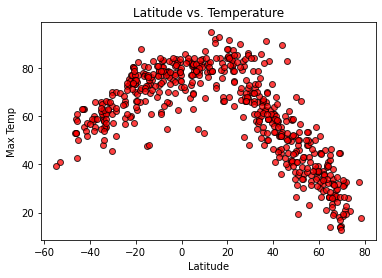

In [13]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature (max)'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data/latitude_vs_temp.png", bbox_inches="tight")

plt.show()


## Latitude vs. Humidity Plot

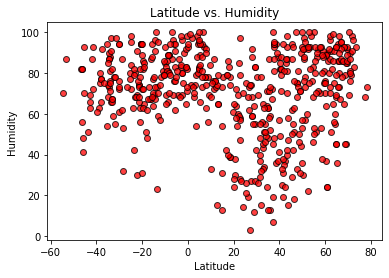

In [14]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/latitude_vs_humidity.png", bbox_inches="tight")

plt.show()

## Latitude vs. Cloudiness Plot

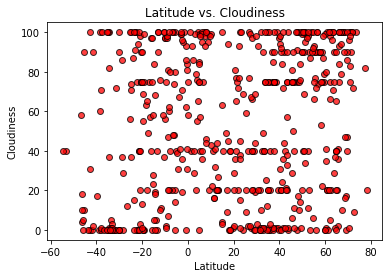

In [15]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/latitude_vs_cloudiness.png", bbox_inches="tight")

plt.show()

## Latitude vs. Wind Speed Plot

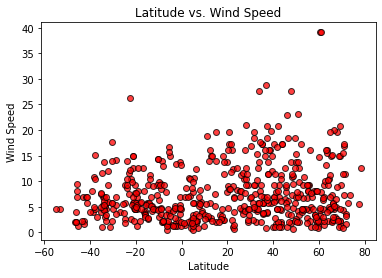

In [16]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/latitude_vs_windspeed.png", bbox_inches="tight")

plt.show()

## Linear Regression

In [17]:
n_hemi = city_data_df.loc[city_data_df['Latitude'] > 0]
n_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
5,Yangi Marg`ilon,40.4272,71.7189,60.80,82,31,6.91,UZ,1619910820
6,Āsasa,7.1000,39.2000,54.55,93,100,0.85,ET,1619911229
7,Ribeira Grande,38.5167,-28.7000,62.60,94,75,16.11,PT,1619910829
8,Albany,42.6001,-73.9662,52.00,37,40,9.22,US,1619910540
9,Berlevåg,70.8578,29.0864,32.25,76,100,16.98,NO,1619910846
...,...,...,...,...,...,...,...,...,...
547,Pangody,65.8500,74.4859,26.22,90,100,15.17,RU,1619911338
548,Limbang,4.7500,115.0000,77.00,100,75,1.88,MY,1619911339
549,Kahului,20.8947,-156.4700,84.20,58,40,19.57,US,1619910784
550,Miranda de Ebro,42.6865,-2.9470,43.00,87,20,1.14,ES,1619911339


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
s_hemi = city_data_df.loc[city_data_df['Latitude'] < 0]
s_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.60,80,91,7.45,PF,1619910664
1,Cape Town,-33.9258,18.4232,57.99,88,0,4.61,ZA,1619910510
2,Busselton,-33.6500,115.3333,55.00,97,5,3.00,AU,1619910697
3,Kaeo,-35.1000,173.7833,66.00,68,0,4.00,NZ,1619911228
4,Avarua,-21.2078,-159.7750,80.60,74,40,14.97,CK,1619910682
...,...,...,...,...,...,...,...,...,...
536,Coyhaique,-45.5752,-72.0662,42.80,93,90,6.91,CL,1619910781
538,Mackay,-21.1500,149.2000,73.99,78,40,14.97,AU,1619911336
541,Ilhabela,-23.7781,-45.3581,70.86,79,100,9.22,BR,1619910849
542,Geraldton,-28.7667,114.6000,51.80,62,86,6.91,AU,1619910444


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
n_hemi.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02
mean,39.898487,17.900792,56.223168,68.110193,55.823691,7.992893,1.619911e+09
std,20.292949,86.934006,20.625374,23.186226,36.820631,6.054418,2.607467e+02
min,1.000000,-179.166700,12.790000,3.000000,0.000000,0.560000,1.619910e+09
25%,24.119050,-54.443150,38.875000,53.000000,20.000000,3.440000,1.619911e+09
50%,40.838200,27.245300,57.150000,73.000000,66.000000,6.690000,1.619911e+09
75%,57.347000,88.021800,74.895000,87.000000,91.500000,11.215000,1.619911e+09
max,78.218600,179.316700,94.930000,100.000000,100.000000,39.120000,1.619911e+09


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.8772705231595763


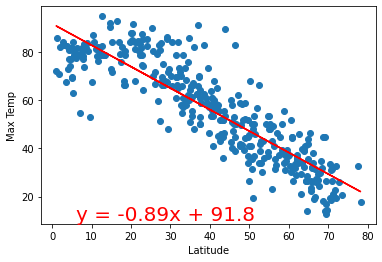

In [20]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.7449729833765153


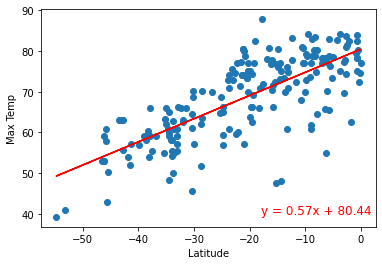

In [21]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1506723826973498


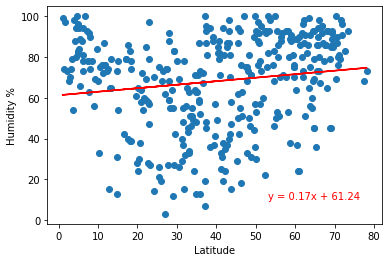

In [22]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3135213737692956


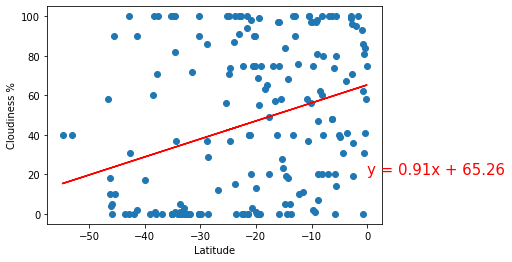

In [23]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06348748695321292


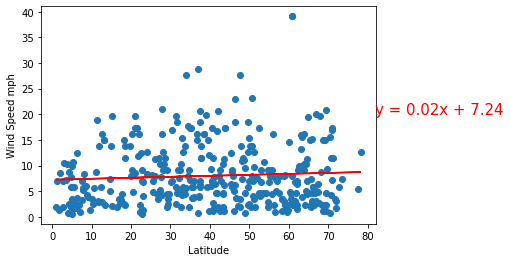

In [24]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0031935896718033423


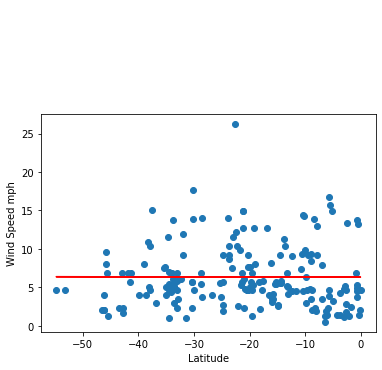

In [25]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()